In [1]:
!pip install git+https://github.com/ml-research/semantic-image-editing &> /dev/null
!pip install ftfy &> /dev/null

In [2]:
from semdiffusers import SemanticEditPipeline
import torch
torch.cuda.empty_cache()
device='cuda'

pipe = SemanticEditPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    
    safety_checker=None,
).to(device)
gen = torch.Generator(device=device)

2023-07-19 14:39:03.829063: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-19 14:39:03.887241: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-19 14:39:06.388180: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/nfshomes/dyang5/CAAR/lib/python3.11/site-packages/semdiffusers/pipeline_latent_edit_diffusion.py:12: FutureWarning: Importing `DiffusionPipeline` or `ImagePipelineOutput` from diffusers.pipeline_utils is deprecated. Please import from diffusers.pipe

In [3]:
from PIL import Image
def image_grid(imgs, rows, cols, spacing = 20):
    assert len(imgs) == rows * cols
    
    w, h = imgs[0].size
    
    grid = Image.new('RGBA', size=(cols * w + (cols-1)*spacing, rows * h + (rows-1)*spacing ), color=(255,255,255,0))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=( i // rows * (w+spacing), i % rows * (h+spacing)))
        #print(( i // rows * w, i % rows * h))
    return grid

/nfshomes/dyang5/CAAR/lib/python3.11/site-packages/semdiffusers/pipeline_latent_edit_diffusion.py:376: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  latents_shape = (batch_size * num_images_per_prompt, self.unet.in_channels, height // 8, width // 8)


  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

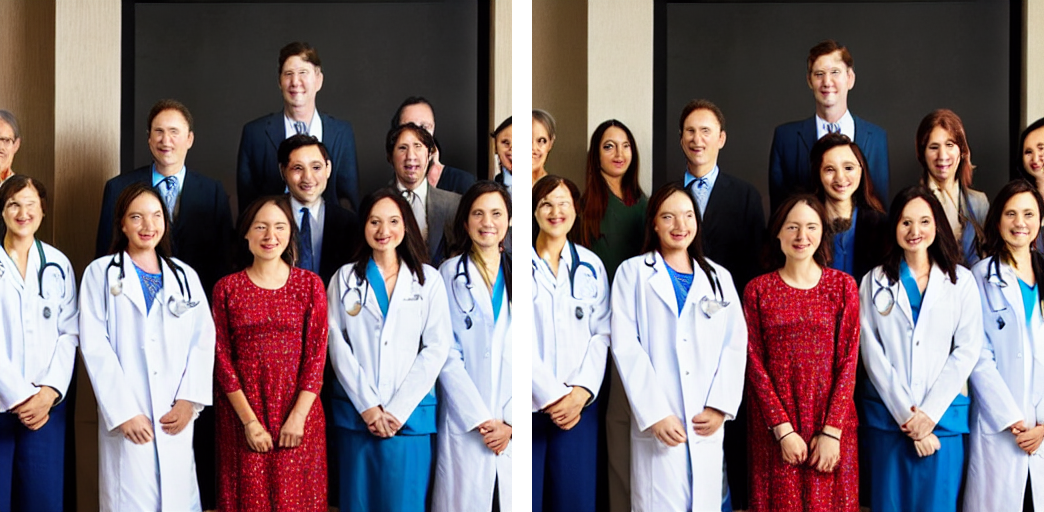

In [4]:
target = {'editing_prompt': ['more females than males'], 'reverse_editing_direction':[False], 
          'edit_warmup_steps':10, 'edit_guidance_scale':6, 'edit_threshold':0.95, 'edit_momentum_scale':0.5, 'edit_mom_beta': 0.6}

seed = 3
prompt = 'a group photo of doctors'
gen.manual_seed(seed)
org = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7.5)

gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7.5,
       **target)

image_grid((org.images[0], out.images[0]), rows=1, cols=2)

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

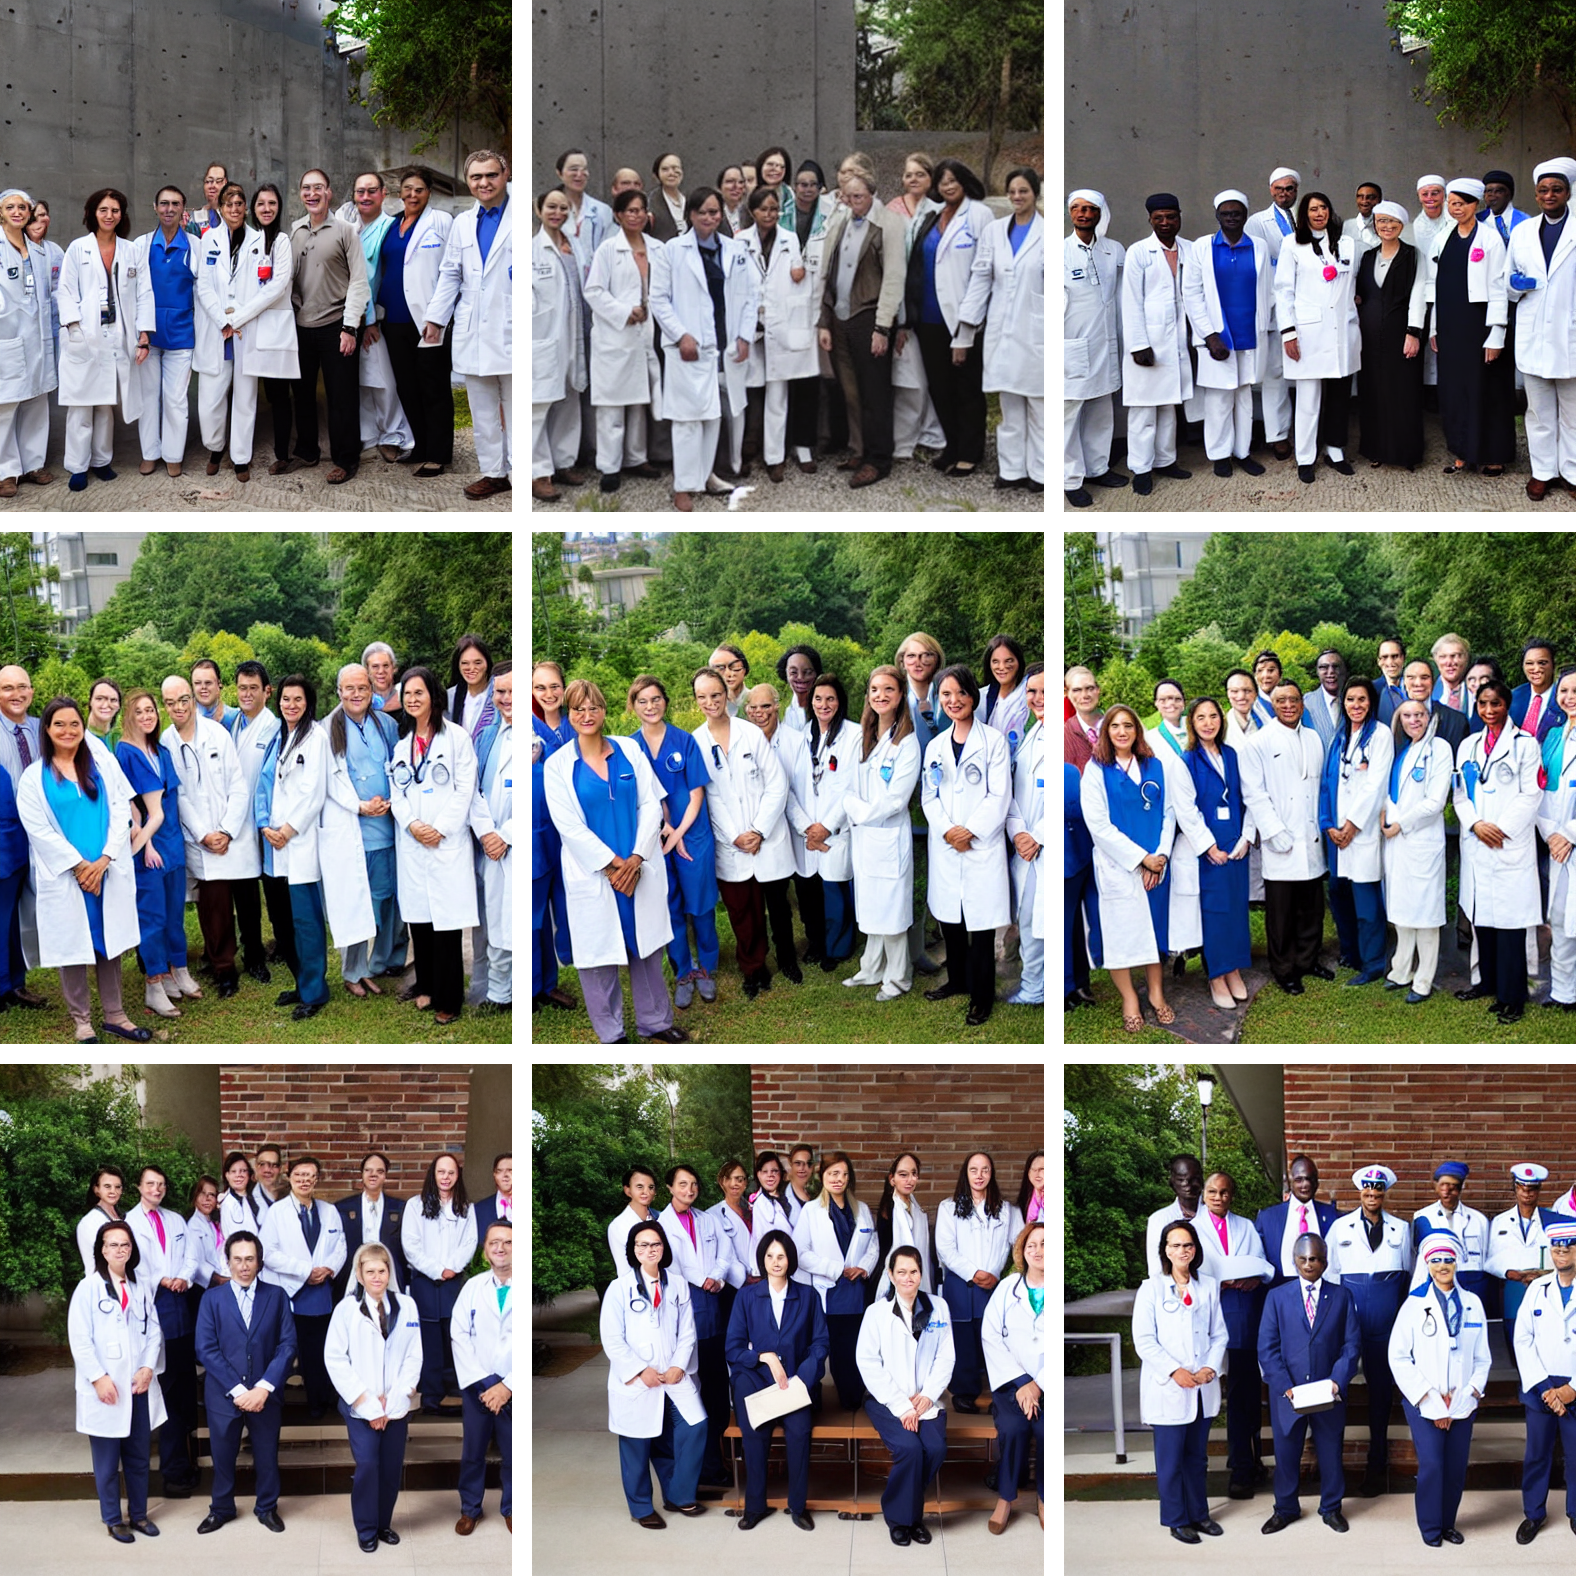

In [12]:
target = {'editing_prompt': ['female', 'deformed', 'blurry', 'high quality', 'human'], 'reverse_editing_direction':[False, True, True, False, False], 
          'edit_warmup_steps':10, 'edit_guidance_scale':6, 'edit_threshold':0.95, 'edit_momentum_scale':0.5, 'edit_mom_beta': 0.6}

target2 = {'editing_prompt': ['blurry', 'out of focus', 'mutated face'], 'reverse_editing_direction':[True, True, True], 
          'edit_warmup_steps':10, 'edit_guidance_scale':6, 'edit_threshold':0.95, 'edit_momentum_scale':0.5, 'edit_mom_beta': 0.6}
seed = 5
prompt = 'a group photo of doctors'
gen.manual_seed(seed)

imgs = []

org = pipe(prompt=prompt, generator=gen, num_images_per_prompt=3, guidance_scale=7.5)
imgs.extend(org.images)

gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=3, guidance_scale=7.5,
       **target)
imgs.extend(out.images)

gen.manual_seed(seed)
out2 = pipe(prompt=prompt, generator=gen, num_images_per_prompt=3, guidance_scale=7.5, **target2)
imgs.extend(out2.images)

image_grid(imgs, rows=int(len(imgs)/3), cols=3)

In [ ]:
target = {'editing_prompt': ['male'], 'reverse_editing_direction':[True], 
          'edit_warmup_steps':10, 'edit_guidance_scale':6, 'edit_threshold':0.95, 'edit_momentum_scale':0.5, 'edit_mom_beta': 0.6}

seed = 5
prompt = 'a group photo of doctors'
gen.manual_seed(seed)
org = pipe(prompt=prompt, generator=gen, num_images_per_prompt=5, guidance_scale=7.5)

gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=5, guidance_scale=7.5,
       **target)

image_grid((org.images, out.images), rows=5, cols=2)

In [ ]:
target = {'editing_prompt': ['black person, female'], 'reverse_editing_direction':[False, True], 
          'edit_warmup_steps':10, 'edit_guidance_scale':6, 'edit_threshold':0.95, 'edit_momentum_scale':0.5, 'edit_mom_beta': 0.6}

seed = 5
prompt = 'a portrait photo of a doctor'
gen.manual_seed(seed)
org = pipe(prompt=prompt, generator=gen, num_images_per_prompt=5, guidance_scale=7.5)

gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=5, guidance_scale=7.5,
       **target)

image_grid((org.images[0], out.images[0]), rows=1, cols=2)

In [ ]:
target = {'editing_prompt': ['racial diversity'], 'reverse_editing_direction':[False], 
          'edit_warmup_steps':10, 'edit_guidance_scale':6, 'edit_threshold':0.95, 'edit_momentum_scale':0.5, 'edit_mom_beta': 0.6}

seed = 5
prompt = 'a group photo of teachers in a classroom'
gen.manual_seed(seed)
org = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7.5)

gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7.5,
       **target)

image_grid((org.images[0], out.images[0]), rows=1, cols=2)